# Bike Sharing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
day = pd.read_csv('day.csv')

In [3]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
day['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

<AxesSubplot:xlabel='cnt', ylabel='Count'>

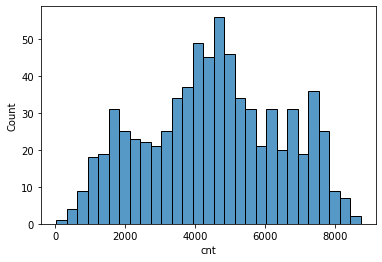

In [5]:
sns.histplot(day['cnt'], binwidth=300)

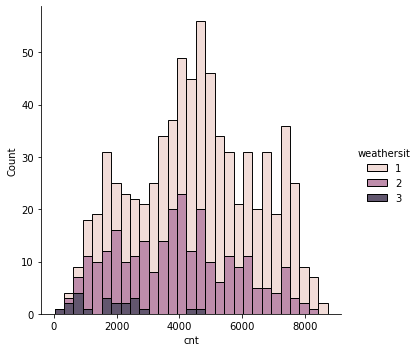

In [6]:
sns.displot(day, x="cnt", hue="weathersit", multiple="stack", binwidth=300)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
df1 = pd.get_dummies(day, columns=['weathersit'], drop_first=True)

In [9]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0
1,2,2011-01-02,1,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0


In [10]:
x = df1[['weathersit_2', 'weathersit_3']]
y = df1['cnt']
model = LinearRegression().fit(x, y)

In [11]:
print(model.coef_)

[ -840.92382893 -3073.50046282]


In [12]:
print(model.intercept_)

4876.7861771058315


Since the weathersit_1 was dropped, the coefficients given above (by model.coef_) each represent the difference in ride counts between when whethersit is 2 and 1, and the difference in ride counts between when weathersit is 3 and 1. Therefore, when the weather is wet (3), the expected ride counts is 3073.50046282 lower than when the weather is clear (1).

In [13]:
y_pred = model.predict(x)

In [14]:
print("Sum of squared error:", mean_squared_error(y, y_pred)*len(y))

Sum of squared error: 2467890819.4370856


In [15]:
print("R squared:", model.score(x,y))

R squared: 0.09915716854692636


Estimated standard deviation of the residual errors are shown below as std err.

In [16]:
import statsmodels.api as sm

X = np.empty(shape=(len(x), 3), dtype=float)
X[:, 0] = 1
X[:, 1:3] = x.values

ols = sm.OLS(y, X)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           3.11e-17
Time:                        23:56:42   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4876.7862     85.567     56.994      0.000    4708.798    5044.774
x1          -840.9238    145.073     -5.797      0.000   -1125.736    -556.112
x2         -3073.5005    410.790     -7.482      0.000   -3879.975   -2267.026
==============================================================================
Omnibus:                       38.064   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.665
Skew:                          -0.061   Prob(JB):                     0.000397
Kurtosis:                       2.293   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = df1[['weathersit_2', 'weathersit_3', 'temp', 'hum', 'windspeed']]
y = df1['cnt']
model = LinearRegression().fit(X, y)

In [18]:
model.coef_

array([ -287.24321797, -1824.47164154,  6395.1590338 , -1905.61757821,
       -3951.1451886 ])

In [19]:
print("The impact on expected ride count due to a 10 degree increase in the temperature is", 
      model.coef_[2]*10)

The impact on expected ride count due to a 10 degree increase in the temperature is 63951.590338006616


In [20]:
Xb = sm.add_constant(X)
mod = sm.OLS(y, Xb)
res = mod.fit()
res.summary()

C:\Users\S\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.62e-100
Time:                        23:56:42   Log-Likelihood:                -6330.5
No. Observations:                 731   AIC:                         1.267e+04
Df Residuals:                     725   BIC:                         1.270e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3434.9195    363.025      9.462      0.000    2722.213    4147.626
weathersit_2  -287.2432    137.135     -2.095      0.037    -556.473     -18.013
weathersit_3 -1824.4716    351.479     -5.191      0.000   -2514.510   -1134.433
temp          6395.1590    295.582     21.636      0.000    5814.860    6975.458
hum          -1905.6176    490.561     -3.885      0.000   -2868.707    -942.528
windspeed    -3951.1452    717.608     -5.506      0.000   -5359.983   -2542.308
==============================================================================
Omnibus:                       23.077   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.208
Skew:                           0.192   Prob(JB):                     0.000822
Kurtosis:                       2.436   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import scipy.special

In [22]:
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(Xb)
X = pd.concat([Xb,pd.DataFrame(X_tr, columns=poly.get_feature_names()).drop(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5'],1)],1)

C:\Users\S\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\S\AppData\Local\Temp/ipykernel_7324/3369862458.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = pd.concat([Xb,pd.DataFrame(X_tr, columns=poly.get_feature_names()).drop(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5'],1)],1)
C:\Users\S\AppData\Local\Temp/ipykernel_7324/3369862458.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X = pd.concat([Xb,pd.DataFrame(X_tr, columns=poly.get_feature_names()).drop(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5'],1)],1)


For each weather situation, the change in expected ride count per 1 degree increase in temperature is shown by the coefficients for x2x4 and x3x4 below. The change in expected ride count per 10 degree increase in temperature can be obtained by multiplying the coefficiens by 10.

In particular, for weathersit = 2, the change in ride count per 10 degree increase in temperature is 9529.789. For weathersit = 3, the change in ride count per 10 degree increase in temperature is -56722.034.

In [23]:
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     49.97
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.78e-96
Time:                        23:56:42   Log-Likelihood:                -6320.5
No. Observations:                 731   AIC:                         1.267e+04
Df Residuals:                     716   BIC:                         1.274e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1291.5144   1267.263      1.019      0.308   -1196.481    3779.509
weathersit_2  5.896e+14   5.83e+14      1.012      0.312   -5.54e+14    1.73e+15
weathersit_3 -1.609e+16   1.59e+16     -1.012      0.312   -4.73e+16    1.51e+16
temp          -1.39e+12   1.37e+12     -1.012      0.312   -4.09e+12    1.31e+12
hum           1.562e+13   1.54e+13      1.012      0.312   -1.47e+13    4.59e+13
windspeed    -1.014e+13      1e+13     -1.012      0.312   -2.98e+13    9.53e+12
x0 x1        -5.896e+14   5.83e+14     -1.012      0.312   -1.73e+15    5.54e+14
x0 x2         1.609e+16   1.59e+16      1.012      0.312   -1.51e+16    4.73e+16
x0 x3          1.39e+12   1.37e+12      1.012      0.312   -1.31e+12    4.09e+12
x0 x4        -1.562e+13   1.54e+13     -1.012      0.312   -4.59e+13    1.47e+13
x0 x5         1.014e+13      1e+13      1.012      0.312   -9.53e+12    2.98e+13
x1 x2         1.256e+13   1.24e+13      1.012      0.312   -1.18e+13    3.69e+13
x1 x3         2171.1316    786.000      2.762      0.006     627.992    3714.271
x1 x4        -3484.8954   1111.815     -3.134      0.002   -5667.702   -1302.089
x1 x5        -2849.5786   1859.419     -1.533      0.126   -6500.144     800.987
x2 x3         -481.9027   2921.490     -0.165      0.869   -6217.614    5253.809
x2 x4          952.9789   1802.972      0.529      0.597   -2586.765    4492.723
x2 x5        -1642.4766   4713.110     -0.348      0.728   -1.09e+04    7610.692
x3 x4        -5672.2034   2919.089     -1.943      0.052   -1.14e+04      58.793
x3 x5         4571.9821   4441.223      1.029      0.304   -4147.395    1.33e+04
x4 x5        -3100.6899   5735.026     -0.541      0.589   -1.44e+04    8158.788
==============================================================================
Omnibus:                       19.333   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.555
Skew:                           0.183   Prob(JB):                      0.00188
Kurtosis:                       2.473   Cond. No.                     6.70e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.8e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""